CONTEXT: Company X manages the men's top professional basketball division of the American league system. The dataset contains information 
on all the teams that have participated in all the past tournaments. It has data about how many baskets each team scored, conceded, how many 
times they came within the first 2 positions, how many tournaments they have qualified, their best position in the past, etc.
• DATA DESCRIPTION: df.csv - The data set contains information on all the teams so far participated in all the past tournaments.
• DATA DICTIONARY:
1. Team: Team’s name
2. Tournament: Number of played tournaments.
3. Score: Team’s score so far.
4. PlayedGames: Games played by the team so far.
5. WonGames: Games won by the team so far.
6. DrawnGames: Games drawn by the team so far.
7. LostGames: Games lost by the team so far.
8. BasketScored: Basket scored by the team so far.
9. BasketGiven: Basket scored against the team so far.
10. TournamentChampion: How many times the team was a champion of the tournaments so far.
11. Runner-up: How many times the team was a runners-up of the tournaments so far.
12. TeamLaunch: Year the team was launched on professional df.
13. HighestPositionHeld: Highest position held by the team amongst all the tournaments played.

• PROJECT OBJECTIVE: Company’s management wants to invest on proposals on managing some of the best teams in the league. The analytics 
department has been assigned with a task of creating a report on the performance shown by the teams. Some of the older teams are already in 
contract with competitors. Hence Company X wants to understand which teams they can approach which will be a deal win for them.

In [26]:
import numpy as np
import pandas as pd

# Loading the CSV file
df = pd.read_csv('DS_Part2_df.csv')

# look at a quick view 
print(df.head(5))


FileNotFoundError: [Errno 2] No such file or directory: 'DS_Part2_df.csv'

In [ ]:

df.describe(include="all")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [ ]:
df.shape

df.head

df.tail

NameError: name 'df' is not defined

In [ ]:
# Data Analysis:  counting the missing values

missing_value_counts = df.isnull().sum()
print(missing_value_counts[0:13])

#update the - sign with 0 (correcting the incorrect values)
df= df.replace('-',0)
# In 'TeamLaunch' column there are characters like 'to', '-', '~'.  so cleaning data by removing these.

df = df.replace(to_replace ='to', value = '-', regex = True) 
df = df.replace(to_replace ='_', value = '-', regex = True) 
df = df.replace(to_replace ='~', value = '-', regex = True)

df.head(10)

NameError: name 'df' is not defined

In [ ]:
## Data Cleaning
#1. TeamLaunch column
#The TeamLaunch column has inconsistent data , this column shows when the team was launched, it shows year or  year range
#To show year range some places a delimeter of '-' is used, someplace a keyword 'to' is used 
#Clean the data to have single delimeter of '-' instead of 'to' 

#2. Last Row

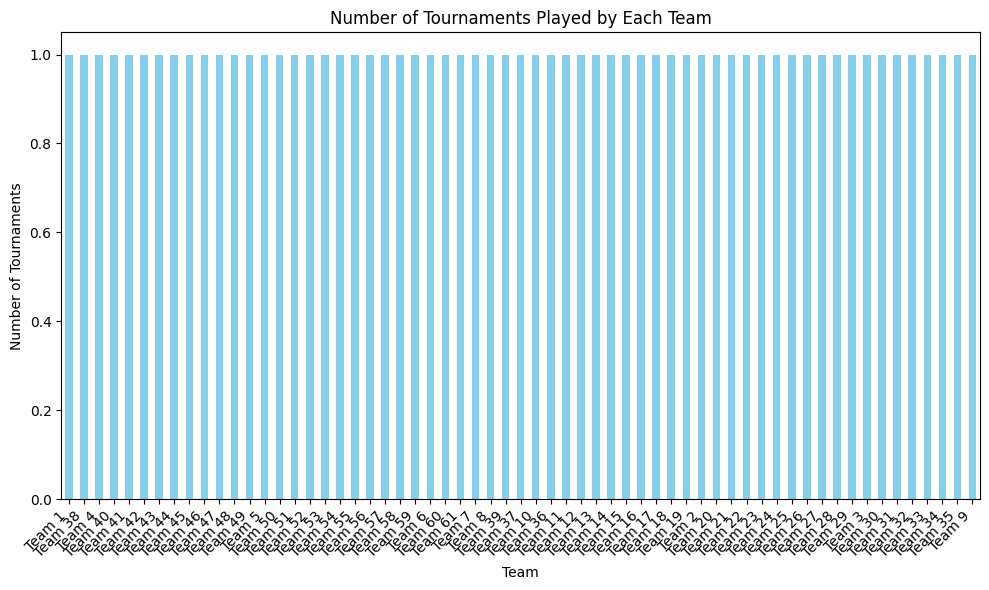

In [ ]:
final_dataset = df

# Grouping the data by team and counting the number of tournaments played
tournaments_played = final_dataset.groupby('Team')['Tournament'].count()

# Sorting the teams based on the number of tournaments played
tournaments_played_sorted = tournaments_played.sort_values(ascending=False)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
tournaments_played_sorted.plot(kind='bar', color='skyblue')
plt.title('Number of Tournaments Played by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Tournaments')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()